In [48]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [33]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [34]:
from citipy import citipy

In [35]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [36]:
import requests
requests.__version__

'2.22.0'

In [37]:
# import API key
from config import weather_api_key

In [38]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [39]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [40]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# loop through all cities in our list
for i, city in enumerate(cities):
    
    #group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count = 1
    #create endpoint URL with each city
    city_url = url + "&q=" + city
    
    
    # log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of set {set_count} | {city}")
    # add 1 to record count
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of set 1 | kapaa
Processing Record 2 of set 1 | port alfred
Processing Record 3 of set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 4 of set 1 | ushuaia
Processing Record 5 of set 1 | bethanien
Processing Record 6 of set 1 | bargal
City not found. Skipping...
Processing Record 7 of set 1 | tuktoyaktuk
Processing Record 8 of set 1 | tasiilaq
Processing Record 9 of set 1 | pascagoula
Processing Record 10 of set 1 | ustikolina
Processing Record 11 of set 1 | hermanus
Processing Record 12 of set 1 | torbay
Processing Record 13 of set 1 | avarua
Processing Record 14 of set 1 | carnarvon
Processing Record 15 of set 1 | san jose
Processing Record 16 of set 1 | punta arenas
Processing Record 17 of set 1 | alexandria
Processing Record 18 of set 1 | dikson
Processing Record 19 of set 1 | nikolskoye
Processing Record 20 of set 1 | luba
Processing Record 21 of set 1 | leh
Processing Record 22 of set 1

Processing Record 33 of set 4 | mount isa
Processing Record 34 of set 4 | bandarbeyla
Processing Record 35 of set 4 | dalbandin
Processing Record 36 of set 4 | coihaique
Processing Record 37 of set 4 | lunca bradului
Processing Record 38 of set 4 | praia
Processing Record 39 of set 4 | tabiauea
City not found. Skipping...
Processing Record 40 of set 4 | mandalgovi
Processing Record 41 of set 4 | tukums
Processing Record 42 of set 4 | spasskoye
Processing Record 43 of set 4 | jamestown
Processing Record 44 of set 4 | port lincoln
Processing Record 45 of set 4 | kavieng
Processing Record 46 of set 4 | atbasar
Processing Record 47 of set 4 | chicama
Processing Record 48 of set 4 | esperance
Processing Record 49 of set 4 | bethel
Processing Record 50 of set 4 | narsaq
Processing Record 1 of set 5 | kentau
Processing Record 2 of set 5 | safford
Processing Record 3 of set 5 | bima
Processing Record 4 of set 5 | kasungu
Processing Record 5 of set 5 | amahai
Processing Record 6 of set 5 | hann

Processing Record 24 of set 8 | manzhouli
Processing Record 25 of set 8 | barawe
City not found. Skipping...
Processing Record 26 of set 8 | huadian
Processing Record 27 of set 8 | muhororo
Processing Record 28 of set 8 | margate
Processing Record 29 of set 8 | pangnirtung
Processing Record 30 of set 8 | san cristobal
Processing Record 31 of set 8 | lolua
City not found. Skipping...
Processing Record 32 of set 8 | amderma
City not found. Skipping...
Processing Record 33 of set 8 | inderborskiy
City not found. Skipping...
Processing Record 34 of set 8 | middleton
Processing Record 35 of set 8 | ponta do sol
Processing Record 36 of set 8 | faanui
Processing Record 37 of set 8 | cairo
Processing Record 38 of set 8 | vila do maio
Processing Record 39 of set 8 | krasnoselkup
Processing Record 40 of set 8 | juliaca
Processing Record 41 of set 8 | saleaula
City not found. Skipping...
Processing Record 42 of set 8 | mangrol
Processing Record 43 of set 8 | tsihombe
City not found. Skipping...
P

Processing Record 7 of set 12 | sinnamary
Processing Record 8 of set 12 | bayangol
Processing Record 9 of set 12 | tevriz
Processing Record 10 of set 12 | omboue
Processing Record 11 of set 12 | khrystynivka
Processing Record 12 of set 12 | biak
Processing Record 13 of set 12 | doha
Processing Record 14 of set 12 | kayes
Processing Record 15 of set 12 | sola
Processing Record 16 of set 12 | san policarpo
Processing Record 17 of set 12 | tarudant
City not found. Skipping...
Processing Record 18 of set 12 | chuy
Processing Record 19 of set 12 | encruzilhada
Processing Record 20 of set 12 | ravar
Processing Record 21 of set 12 | lasa
Processing Record 22 of set 12 | daru
Processing Record 23 of set 12 | victor harbor
Processing Record 24 of set 12 | lang son
Processing Record 25 of set 12 | malanje
Processing Record 26 of set 12 | waddan
Processing Record 27 of set 12 | bucsa
Processing Record 28 of set 12 | acapulco
Processing Record 29 of set 12 | havelock
Processing Record 30 of set 12

In [41]:
len(city_data)

561

In [42]:
# convert the array of dictinaries to a pandas dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.08,-159.32,71.60,83,90,19.46,US,2020-05-07 15:44:30
1,Port Alfred,-33.59,26.89,66.99,89,100,1.01,ZA,2020-05-07 15:44:31
2,Ushuaia,-54.80,-68.30,42.80,75,100,5.82,AR,2020-05-07 15:40:06
3,Bethanien,-26.50,17.16,79.92,16,0,4.07,NA,2020-05-07 15:44:31
4,Tuktoyaktuk,69.45,-133.04,14.00,92,75,10.29,CA,2020-05-07 15:44:31
5,Tasiilaq,65.61,-37.64,44.60,39,40,1.12,GL,2020-05-07 15:44:31
6,Pascagoula,30.37,-88.56,66.20,39,1,4.70,US,2020-05-07 15:44:31
7,Ustikolina,43.58,18.79,60.80,38,40,12.75,BA,2020-05-07 15:44:31
8,Hermanus,-34.42,19.23,66.99,81,100,6.60,ZA,2020-05-07 15:40:01
9,Torbay,47.67,-52.73,48.99,74,20,21.92,CA,2020-05-07 15:43:08


In [43]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2020-05-07 15:44:30,22.08,-159.32,71.60,83,90,19.46
1,Port Alfred,ZA,2020-05-07 15:44:31,-33.59,26.89,66.99,89,100,1.01
2,Ushuaia,AR,2020-05-07 15:40:06,-54.80,-68.30,42.80,75,100,5.82
3,Bethanien,NA,2020-05-07 15:44:31,-26.50,17.16,79.92,16,0,4.07
4,Tuktoyaktuk,CA,2020-05-07 15:44:31,69.45,-133.04,14.00,92,75,10.29
5,Tasiilaq,GL,2020-05-07 15:44:31,65.61,-37.64,44.60,39,40,1.12
6,Pascagoula,US,2020-05-07 15:44:31,30.37,-88.56,66.20,39,1,4.70
7,Ustikolina,BA,2020-05-07 15:44:31,43.58,18.79,60.80,38,40,12.75
8,Hermanus,ZA,2020-05-07 15:40:01,-34.42,19.23,66.99,81,100,6.60
9,Torbay,CA,2020-05-07 15:43:08,47.67,-52.73,48.99,74,20,21.92


In [44]:
# create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [45]:
# extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [46]:
import time

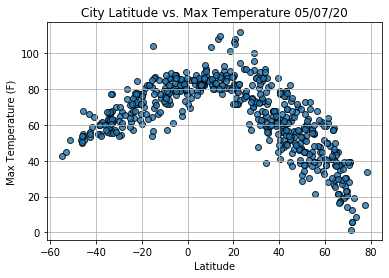

In [51]:
# build the scatter plot for latitude vs max temp
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

#show plot
plt.show()

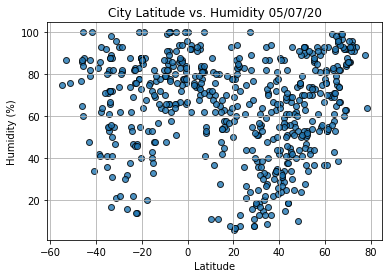

In [52]:
# build the scatter plot for latitude vs humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

#show plot
plt.show()

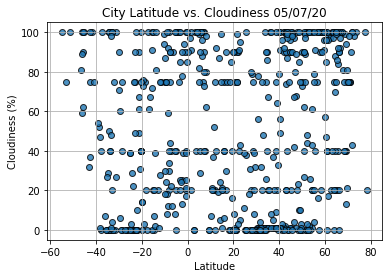

In [53]:
# build the scatter plot for latitude vs cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

#show plot
plt.show()

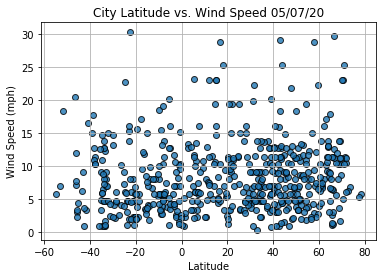

In [54]:
# build the scatter plot for latitude vs wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

#show plot
plt.show()